# One vs All logistic regression model for handwritten digits

In [9]:
def displayData(X):
    for i in range(28):
        plt.subplot(4, 7, i+1)
        plt.imshow(X[i].reshape(8,8))

In [10]:
def costFunction(theta, X, y, _lambda):
    m = y.shape[0]
    n = X.shape[1]
    
    J = 0
    theta = theta.reshape(-1,1)
    
    grad = np.zeros(theta.shape)
    h = sigmoid(X@theta)
    J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h)-(_lambda/2)*(theta[1:].T@theta[1:]))
    
    grad[0] = 1/m * ((X[:,0]).T@(h-y)) 
    grad[1:] = 1/m * (X[:,1:].T@(h-y)) + (_lambda/m)*theta[1:]
    
    theta = theta.reshape(-1)
    grad = grad.reshape(-1)
    
    return J.item(), grad

In [11]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z))

    return g

In [12]:
def train(X, y, num_labels, _lambda):
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n+1))
    
    X = np.append(np.ones((m,1)), X, axis=1)
    
    for c in range(num_labels):
        theta_0 = np.zeros((n+1, 1))
        J = lambda theta: costFunction(theta, X, 1*(y==c), _lambda)[0]
        dJ = lambda theta: costFunction(theta, X, 1*(y==c), _lambda)[1]
        theta = optimize.fmin_cg(J, theta_0, fprime=dJ)
        all_theta[c,:] = theta
    
    return all_theta

In [13]:
def predict(X, theta):
    m = X.shape[0]
    num_labels = theta.shape[0]
    
    p = np.zeros((X.shape[0], 1))
    
    X = np.append(np.ones((m,1)), X, axis=1)
    
    z = X@theta.T
    
    h = sigmoid(X@theta.T)
    
    p = np.argmax(h, axis=1)
    
    return p.reshape(-1,1)

# Plotting some examples

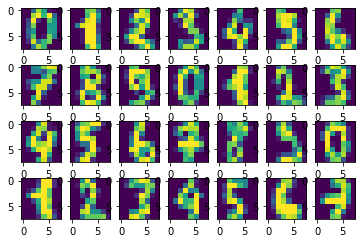

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from scipy import optimize


digits = load_digits()

X = digits.data
y = digits.target.reshape(-1, 1)

displayData(X)

# Training model

In [15]:
m = digits.data.shape[0]

input_layer_size = m
num_labels = 10

_lambda = 3

all_theta = train(X, y, num_labels, _lambda)

<ipython-input-10-f764f1f87a37>:10: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h)-(_lambda/2)*(theta[1:].T@theta[1:]))
<ipython-input-10-f764f1f87a37>:10: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h)-(_lambda/2)*(theta[1:].T@theta[1:]))


Optimization terminated successfully.
         Current function value: 0.001785
         Iterations: 823
         Function evaluations: 1711
         Gradient evaluations: 1711
Optimization terminated successfully.
         Current function value: 0.021179
         Iterations: 2928
         Function evaluations: 5625
         Gradient evaluations: 5625
Optimization terminated successfully.
         Current function value: 0.002750
         Iterations: 1214
         Function evaluations: 2441
         Gradient evaluations: 2441
Optimization terminated successfully.
         Current function value: 0.018632
         Iterations: 1798
         Function evaluations: 3589
         Gradient evaluations: 3589
Optimization terminated successfully.
         Current function value: 0.003463
         Iterations: 814
         Function evaluations: 1584
         Gradient evaluations: 1584


<ipython-input-10-f764f1f87a37>:10: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h)-(_lambda/2)*(theta[1:].T@theta[1:]))
<ipython-input-10-f764f1f87a37>:10: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h)-(_lambda/2)*(theta[1:].T@theta[1:]))


Optimization terminated successfully.
         Current function value: 0.006266
         Iterations: 1772
         Function evaluations: 3632
         Gradient evaluations: 3632
Optimization terminated successfully.
         Current function value: 0.004345
         Iterations: 1202
         Function evaluations: 2483
         Gradient evaluations: 2483
Optimization terminated successfully.
         Current function value: 0.005491
         Iterations: 1055
         Function evaluations: 2131
         Gradient evaluations: 2131
Optimization terminated successfully.
         Current function value: 0.070306
         Iterations: 1575
         Function evaluations: 3175
         Gradient evaluations: 3172
Optimization terminated successfully.
         Current function value: 0.022213
         Iterations: 2917
         Function evaluations: 5668
         Gradient evaluations: 5668


# Predicting for all training examples and calculating the model accuracy

In [16]:
y_predict = predict(X, all_theta)
print('train accuracy: ',np.mean(1*(y_predict==y))*100,'%')

train accuracy:  99.4991652754591 %


# Predicting for one random training example

Text(0.5, 1.0, 'predicted: 7')

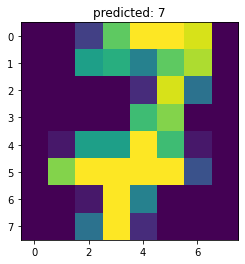

In [17]:
random = np.random.randint(m)
example = X[random].reshape(1,-1)
predicted = predict(example, all_theta).item()
plt.imshow(example.reshape(8,8))
plt.title('predicted: '+str(predicted))